## K Means Clustering Implementation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [4]:
X.shape

(1000, 2)

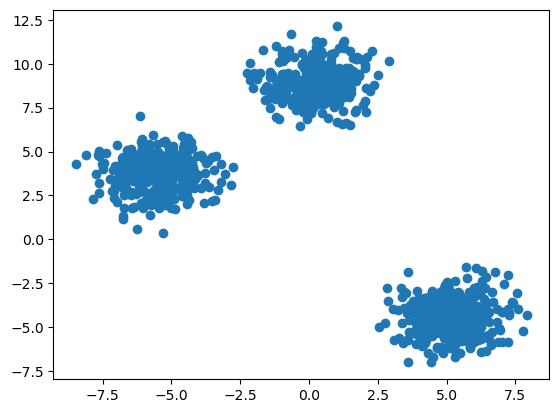

In [8]:
plt.scatter(X[:,0],X[:,1])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [11]:
from sklearn.cluster import KMeans

In [14]:
## Manual process
## Elbow Method to select the K value 

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [15]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.4677884655127,
 991.8238694516631,
 853.3611045191168,
 756.9310509744008,
 664.1099094942359,
 578.779930290414,
 538.6934427063414]

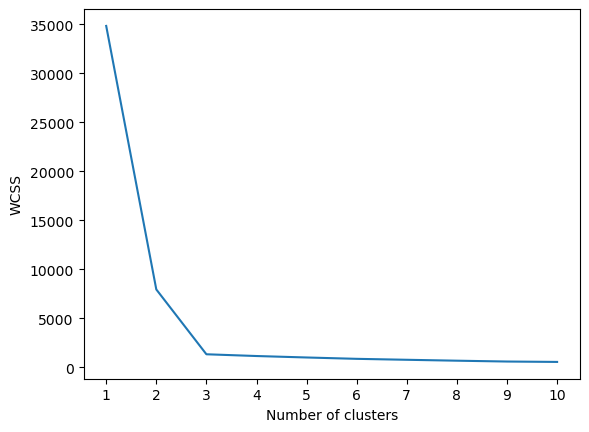

In [16]:
#elbow curve 

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [19]:
y_lables = kmeans.fit_predict(X_train)

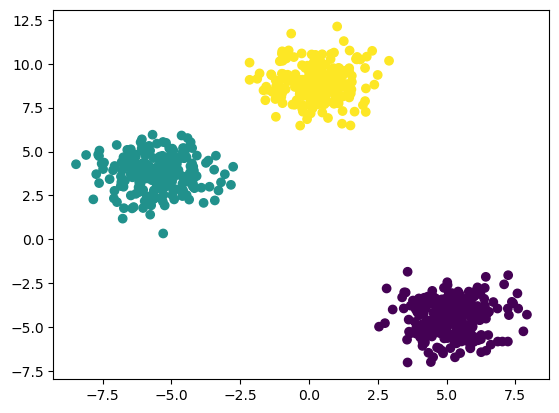

In [20]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_lables)

In [22]:
y_test_lables = kmeans.predict(X_test)

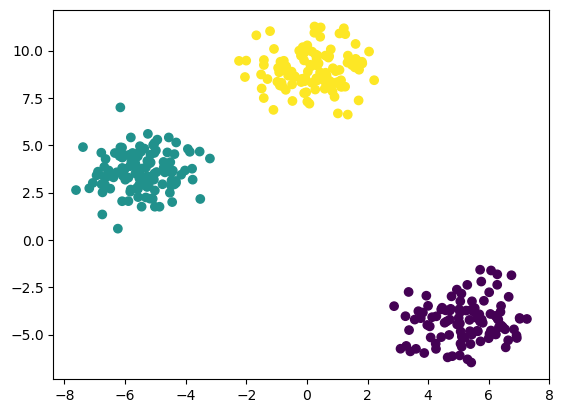

In [23]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_lables)

In [24]:
## Knee locater 
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [25]:
from kneed import KneeLocator

In [26]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [27]:
## performance metrics

In [28]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_coefficients = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [42]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4814001336222496,
 0.3373328857902144,
 0.3284507891669567,
 0.34893936289961064,
 0.3456048745725144,
 0.34057763852568457]

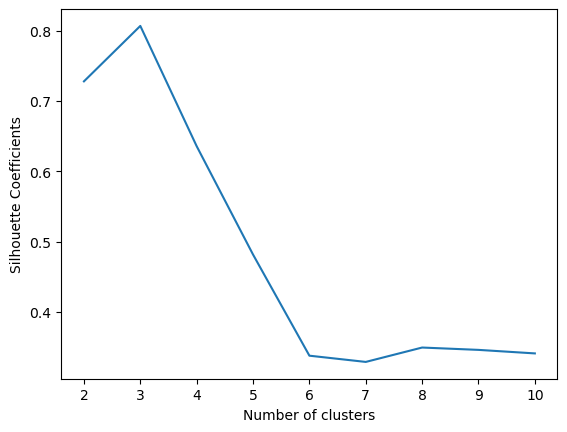

In [43]:


plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()